In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Import necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
# all_datasets = ['manual_mc1', 'manual_tf3', 'manual_mnn1', 'manual_sys1', 'manual_stress2', 'user7zip', 'usercp2k', 'usercrypto', 'usergzip', 'userstream2', 'userfio', 'userramspeed', 'usertinymemb', 'userlinux', 'idle']
all_datasets = ['mc', 'mc2', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress', '7zip', 'cp2k', 'crypto', 'gzip', 'stream', 'fio', 'leveldb', 'mbw', 'ramspeedsmp', 'tinymemb', 'litesql', 'lkernel', 'filebench_all', 'ycsbmongo_all2', 'syscpu', 'sysmem', 'idle', 'exp1model2','exp2model2','exp3model2','exp4model2','exp5model2','exp6model2','exp7model2', 'exp8model2', 'exp9model2', 'exp10model2', 'exp11model2', 'exp7app1model2', 'exp8app1model2', 'exp9app1model2','exp7app2model2', 'exp8app2model2', 'exp9app2model2','exp7app3model2', 'exp8app3model2', 'exp9app3model2', 'exp10app1model2', 'exp10app2model2', 'exp10app3model2', 'exp11app1model2', 'exp11app2model2', 'exp11app3model2', 'exp12model1', 'exp12app1model1', 'exp12app2model1', 'exp12model2', 'exp12app1model2', 'exp12app2model2', 'exp12app3model2', 'exp13model1', 'exp13app1model1', 'exp13app2model1', 'exp13model2', 'exp13app1model2', 'exp13app2model2', 'exp13app3model2', 'all_mem', 'all_tf', 'all_mnn', 'all_sys', 'all_7zip', 'all_cp2k', 'all_cryptopp', 'all_gzip', 'all_stream', 'all_fio', 'all_ramspeed', 'all_tinymembench', 'all_linux', 'all_leveldb', 'all_mbw', 'all_sqlite', 'stresscpu', 'stressdram', 'stressdisk']
df_all = {}
for i in all_datasets:
    if i.endswith('model2'):
        df_all[i.split('model2')[0]] = pd.read_csv("datasets/final-" + i + ".csv")
    else:
        df_all[i] = pd.read_csv("datasets/final-" + i + ".csv")
# df1 = pd.read_csv("datasets/final-mc.csv")
# df2 = pd.read_csv("datasets/final-tf.csv")
# df3 = pd.read_csv("datasets/final-mnn.csv")
# df4 = pd.read_csv("datasets/final-sys.csv")
# df5 = pd.read_csv("datasets/final-stress.csv")
# df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
# df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]
# df3 = df3.loc[:, ~df3.columns.str.contains('^Unnamed')]
# df4 = df4.loc[:, ~df4.columns.str.contains('^Unnamed')]
# df5 = df5.loc[:, ~df5.columns.str.contains('^Unnamed')]
for test in df_all:
    df_all[test] = df_all[test].loc[:, ~df_all[test].columns.str.contains('^Unnamed')]
    df_all[test] = df_all[test][sorted(df_all[test].columns)]
    cols = list(df_all[test].columns.values)
    cols.pop(cols.index('power'))
    cols.pop(cols.index('pkg_pwr')) #Remove package power from list
    cols.pop(cols.index('ram_pwr')) #Remove RAM power from list
    df_all[test] = df_all[test][cols+['pkg_pwr', 'ram_pwr', 'power']]
    
    


In [3]:
# p_idle = np.mean(df_all['idle'].power)
# p_idle = 110

In [3]:
# trainset = ['manual_mc1', 'manual_tf3', 'manual_mnn1', 'manual_sys1', 'manual_stress2', 'user7zip', 'usercp2k', 'usercrypto', 'usergzip', 'userstream2', 'userfio', 'userramspeed', 'usertinymemb', 'userlinux', 'idle']
# trainset = ['mc', 'mc2', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress', '7zip', 'cp2k', 'crypto', 'gzip', 'stream', 'fio', 'leveldb', 'mbw', 'ramspeedsmp', 'tinymemb', 'litesql', 'lkernel', 'filebench_all', 'ycsbmongo_all2', 'syscpu', 'sysmem', 'idle']
trainset = ['exp1','exp2','exp3','exp4','exp5','exp6','exp7','exp8','exp9','exp10','exp11','exp7app1','exp7app2','exp7app3','exp8app1','exp8app2','exp8app3','exp9app1','exp9app2','exp9app3']
testset = ['exp8']
ignoreset = ['filebench_all', 'ycsbmongo_all2',]
# ignoreset = ['mc', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress']
ignoreset = ['exp7','exp8','exp9','exp10']
alwaysignore = ['exp7app1','exp7app2','exp7app3','exp8app1','exp8app2','exp8app3','exp9app1','exp9app2','exp9app3']
# alwaysignore = ['7zip', 'cp2k', 'crypto', 'gzip', 'stream', 'fio', 'leveldb', 'mbw', 'ramspeedsmp', 'tinymemb', 'litesql', 'lkernel', 'syscpu', 'sysmem', 'mc2', 'idle']
df_train = pd.DataFrame()
# df_train = df_all[trainset[0]]
# print(trainset[0], "included in training set")
for t in trainset:
    if t in ignoreset or t in alwaysignore:
        continue
    df_train = df_train.append(df_all[t], ignore_index=True)
    print(t, "included in training set")

df_test = pd.DataFrame()
for t in testset:
    df_test = df_test.append(df_all[t], ignore_index=True)
    print(t, "included in testing set")

exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp11 included in training set
exp8 included in testing set


/var/folders/5l/144n_3m9249dj9_cd9m97pf80000gn/T/ipykernel_11814/826747898.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/5l/144n_3m9249dj9_cd9m97pf80000gn/T/ipykernel_11814/826747898.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)


In [4]:
# res_df = pd.DataFrame()
svr_i = 0
beta_0 = 0
preds_1 = {}
df_t = {}
def run_models(ts):
    global svr_i
    global beta_0
    print(ts)
    p_flag = True
    b_flag = True
    r_flag = True
    preds1 = {}
    df_idle = pd.read_csv("datasets/final-idlerun.csv")
    df_idle = df_idle.loc[:, ~df_idle.columns.str.contains('^Unnamed')]
    p_idle = np.mean(df_idle.power)
    df_mean = []
    for i in df_idle:
        df_mean.append(np.mean(df_idle[i]))
#         print(np.mean(df_idle[i]))
#     print(df_mean)
    if p_flag == True:

        df_train.power -= p_idle
    if r_flag == True:
        colNames = ["LLC-load-misses", "LLC-loads", "LLC-store-misses", "LLC-stores", "blocks", "bytes", "cycles", "instructions", "ref-cycles"]
        i = 0
        for cols in colNames:
            df_train[cols] -= df_mean[i]
            df_test[cols] -= df_mean[i]
            i += 1
    
    ss = MinMaxScaler()
    sc_X = ss.fit_transform(df_train)
    sc_X = pd.DataFrame(data=sc_X)
    # ss = StandardScaler()
    sc_Y = ss.transform(df_test)
    sc_Y = pd.DataFrame(data=sc_Y)

    X1 = sc_X.iloc[:, np.r_[:4,4:9]].values
    y1 = df_train.iloc[:, -1:].values
    X2 = sc_Y.iloc[:, np.r_[:4,4:9]].values
    y2 = df_test.iloc[:, -1:].values

    std_=np.std(df_train.power)
    mean_=np.mean(df_train.power)
    def destandardize(var):
        return var
#         newVar=var+mean_
#         return newVar
    

    model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds1['NN'] = y_pred.flatten()

    ss = StandardScaler(with_std=False)
    sc_X = ss.fit_transform(df_train)
    sc_X = pd.DataFrame(data=sc_X)
    # ss = StandardScaler()
    sc_Y = ss.transform(df_test)
    sc_Y = pd.DataFrame(data=sc_Y)

    X1 = sc_X.iloc[:, :-3].values
    y1 = df_train.iloc[:, -1:].values
    X2 = sc_Y.iloc[:, :-3].values
    y2 = df_test.iloc[:, -1:].values

    model = LinearRegression(fit_intercept=b_flag)
    model.fit(X1, y1)
    beta_0 = model.intercept_
    y_pred = model.predict(X2)
    print(beta_0)
    y_pred=destandardize(y_pred)
    preds1['Linear Regression'] = y_pred.flatten()

    # model = DecisionTreeRegressor()
    # model.fit(X1, y1)
    # y_pred = model.predict(X2)
    # y_pred=destandardize(y_pred)
    # preds1['Decision Tree'] = y_pred.flatten()

    # model = RandomForestRegressor()
    # model.fit(X1, y1)
    # y_pred = model.predict(X2)
    # y_pred=destandardize(y_pred)
    # preds1['Random Forest'] = y_pred.flatten()

    # model = SVR(kernel="rbf")
    # model.fit(X1, y1)
    # svr_i = model.intercept_
    # print("SVR intercept:", model.intercept_)
    # y_pred = model.predict(X2)
    # y_pred=destandardize(y_pred)
    # preds1['SVR'] = y_pred.flatten()
    params = {
        'n_estimators': 900,    # You can adjust this based on your dataset size and compute resources
        'max_depth': 6,         # Experiment with values in the range of 3 to 10
        'learning_rate': 0.03,  # Adjust this based on your problem and dataset
        'subsample': 0.6,      # Control the fraction of data used for each boosting round
        'colsample_bytree': 0.6,  # Fraction of features used for each tree
        'min_child_weight': 3,    # Tune this depending on dataset characteristics
        'gamma': 3,              # Regularization parameter
        'random_state': 42      # Set a random seed for reproducibility
    }
    model = XGBRegressor(**params)
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds1['XGBoost'] = y_pred.flatten()

    # model = Lasso(alpha=0.1)
    # model.fit(X1, y1)
    # y_pred = model.predict(X2)
    # y_pred=destandardize(y_pred)
    # preds1['Lasso'] = y_pred.flatten()
    
    preds_1[ts] = preds1

    # models = ['NN', 'Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Lasso']
    models = ['Linear Regression', 'NN', 'XGBoost']
#     models = ['SVR']
    results1 = {}
    oldY=df_test.power
    std_Y=np.std(df_test.power)
    for m in models:
        l = len(preds1[m])
        p1 = (preds1[m][:l])
        total_pred = p1 if p_flag == False else (p1 + p_idle)
        mae = mean_absolute_error(oldY[:l], total_pred)
        mape = mean_absolute_percentage_error(oldY[:l], total_pred)
        mae = round(mae, 2)
        mape = round((mape*100), 2)
        std_Y = round(std_Y, 2)
        print(m)
#         print("Mean absolute error:", mae)
        print("Mean absolute percentage error:", mape)
#         print("Standard deviation of test set:", std_Y)
        # add results to dictionary
        results1[m] = [mae, mape, std_Y]
        
#         df_plot = pd.DataFrame({'Actual': oldY[:l], 'Pred': total_pred})
#         plt.figure(figsize=(10, 3))
#         plt.plot(df_plot)
#         plt.legend(df_plot.columns)
#         plt.ylabel("Power in Watts")
#         plt.xlabel("Time in Seconds")
#         plt.show()

    results1_df = pd.DataFrame(results1, index=['MAE', 'MAPE', 'STD'])
#     res_df = res_df.append(results_df, ignore_index=True)
#     print('MAPE:')
#     for i, row in results_df.T.iterrows():
#         print(i + ' ' +  str(row['MAPE']) + '%')

#     for i, row in results1_df.T.iterrows():
#         print(row['MAE'])
#         print(row['MAPE'])
#         print(row['STD'])
#         print(0)

# testing  = ['exp7','exp8', 'exp10','exp11']
testing  = ['exp7app1','exp8app1','exp10app1','exp11app1','exp12app1','exp13app1']
# testing = ['all_mem', 'all_sys']
for ts in testing:
    print(ts)
    trainset = ['exp1','exp2','exp3','exp4','exp5','exp6','exp7','exp8','exp9','exp10','exp11','exp12','exp13','exp7app1','exp7app2','exp7app3','exp8app1','exp8app2','exp8app3','exp9app1','exp9app2','exp9app3', 'exp10app1','exp10app2','exp10app3','exp11app1','exp11app2','exp11app3']
    testset = [ts]
    ignoreset = ['exp7','exp8','filebench_all', 'ycsbmongo_all2','mc', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress', 'exp10','exp11','exp12','exp13']
#     ignoreset = ['exp7','exp8']
    alwaysignore = ['exp7app1','exp7app2','exp7app3','exp8app1','exp8app2','exp8app3','exp9app1','exp9app2','exp9app3','exp10app1','exp10app2','exp10app3','exp11app1','exp11app2','exp11app3']
    df_train = pd.DataFrame()
    # df_train = df_all[trainset[0]]
#     print(trainset[0], "included in training set")
    for t in trainset:
        if t in testset or t in ignoreset or t in alwaysignore:
#             print(t, "ignored")
            continue
        df_train = df_train.append(df_all[t], ignore_index=True)
        print(t, "included in training set")

    df_test = pd.DataFrame()
    for t in testset:
        df_test = df_test.append(df_all[t], ignore_index=True)
        print(t, "included in testing set")
    df_t[ts] = df_test
    run_models(ts)

# for i, row in res_df.T.iterrows():
#     print(row['MAE'])
#     print(row['MAPE'])
#     print(row['STD'])
#     print(0)
    

exp7app1
exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1172611212.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1172611212.py:186: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


exp9 included in training set
exp7app1 included in testing set
exp7app1
[100.68012915]
Linear Regression
Mean absolute percentage error: 23.19
NN
Mean absolute percentage error: 23.01
XGBoost
Mean absolute percentage error: 25.32
exp8app1
exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp9 included in training set
exp8app1 included in testing set
exp8app1


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1172611212.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1172611212.py:186: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[100.68012915]
Linear Regression
Mean absolute percentage error: 18.57
NN
Mean absolute percentage error: 18.99
XGBoost
Mean absolute percentage error: 17.56
exp10app1
exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp9 included in training set
exp10app1 included in testing set
exp10app1


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1172611212.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1172611212.py:186: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[100.68012915]
Linear Regression
Mean absolute percentage error: 26.34
NN
Mean absolute percentage error: 21.51
XGBoost
Mean absolute percentage error: 26.77
exp11app1
exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp9 included in training set
exp11app1 included in testing set
exp11app1


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1172611212.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1172611212.py:186: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[100.68012915]
Linear Regression
Mean absolute percentage error: 27.41
NN
Mean absolute percentage error: 26.26
XGBoost
Mean absolute percentage error: 26.51
exp12app1
exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp9 included in training set
exp12app1 included in testing set
exp12app1


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1172611212.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1172611212.py:186: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[100.68012915]
Linear Regression
Mean absolute percentage error: 13.95
NN
Mean absolute percentage error: 22.14
XGBoost
Mean absolute percentage error: 13.03
exp13app1
exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp9 included in training set
exp13app1 included in testing set
exp13app1


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1172611212.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1172611212.py:186: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[100.68012915]
Linear Regression
Mean absolute percentage error: 45.32
NN
Mean absolute percentage error: 10.1
XGBoost
Mean absolute percentage error: 8.78


In [5]:
# res_df = pd.DataFrame()

preds_2 = {}
df_t = {}
def run_models(ts):
#     global res_df
    print(ts)
    p_flag = True
    b_flag = True
    r_flag = True
    preds2 = {}

    df_idle = pd.read_csv("datasets/final-idlerun.csv")
    df_idle = df_idle.loc[:, ~df_idle.columns.str.contains('^Unnamed')]
    p_idle = np.mean(df_idle.power)
    df_mean = []
    for i in df_idle:
        df_mean.append(np.mean(df_idle[i]))
#         print(np.mean(df_idle[i]))
#     print(df_mean)
    if p_flag == True:

        df_train.power -= p_idle
    if r_flag == True:
        colNames = ["LLC-load-misses", "LLC-loads", "LLC-store-misses", "LLC-stores", "blocks", "bytes", "cycles", "instructions", "ref-cycles"]
        i = 0
        for cols in colNames:
            df_train[cols] -= df_mean[i]
            df_test[cols] -= df_mean[i]
            i += 1
    
    ss = MinMaxScaler()
    sc_X = ss.fit_transform(df_train)
    sc_X = pd.DataFrame(data=sc_X)
    # ss = StandardScaler()
    sc_Y = ss.transform(df_test)
    sc_Y = pd.DataFrame(data=sc_Y)

    X1 = sc_X.iloc[:, np.r_[:4,4:9]].values
    y1 = df_train.iloc[:, -1:].values
    X2 = sc_Y.iloc[:, np.r_[:4,4:9]].values
    y2 = df_test.iloc[:, -1:].values

    std_=np.std(df_train.power)
    mean_=np.mean(df_train.power)
    def destandardize(var):
        return var
#         newVar=var+mean_
#         return newVar
    

    model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds2['NN'] = y_pred.flatten()

    ss = StandardScaler(with_std=False)
    sc_X = ss.fit_transform(df_train)
    sc_X = pd.DataFrame(data=sc_X)
    # ss = StandardScaler()
    sc_Y = ss.transform(df_test)
    sc_Y = pd.DataFrame(data=sc_Y)

    X1 = sc_X.iloc[:, :-3].values
    y1 = df_train.iloc[:, -1:].values
    X2 = sc_Y.iloc[:, :-3].values
    y2 = df_test.iloc[:, -1:].values

    model = LinearRegression(fit_intercept=b_flag)
    model.fit(X1, y1)
    beta0 = model.intercept_
    y_pred = model.predict(X2)
    print(beta0)
    y_pred=destandardize(y_pred)
    preds2['Linear Regression'] = y_pred.flatten()

    # model = DecisionTreeRegressor()
    # model.fit(X1, y1)
    # y_pred = model.predict(X2)
    # y_pred=destandardize(y_pred)
    # preds2['Decision Tree'] = y_pred.flatten()

    # model = RandomForestRegressor()
    # model.fit(X1, y1)
    # y_pred = model.predict(X2)
    # y_pred=destandardize(y_pred)
    # preds2['Random Forest'] = y_pred.flatten()

    # model = SVR()
    # model.fit(X1, y1)
    # print("SVR intercept:", model.intercept_)
    # y_pred = model.predict(X2)
    # y_pred=destandardize(y_pred)
    # preds2['SVR'] = y_pred.flatten()
    params = {
        'n_estimators': 900,    # You can adjust this based on your dataset size and compute resources
        'max_depth': 6,         # Experiment with values in the range of 3 to 10
        'learning_rate': 0.03,  # Adjust this based on your problem and dataset
        'subsample': 0.6,      # Control the fraction of data used for each boosting round
        'colsample_bytree': 0.6,  # Fraction of features used for each tree
        'min_child_weight': 3,    # Tune this depending on dataset characteristics
        'gamma': 3,              # Regularization parameter
        'random_state': 42      # Set a random seed for reproducibility
    }
    model = XGBRegressor(**params)
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds2['XGBoost'] = y_pred.flatten()

    # model = Lasso(alpha=0.1)
    # model.fit(X1, y1)
    # y_pred = model.predict(X2)
    # y_pred=destandardize(y_pred)
    # preds2['Lasso'] = y_pred.flatten()

    preds_2[ts] = preds2


    # models = ['NN', 'Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Lasso']
    models = ['Linear Regression', 'NN', 'XGBoost']
#     models = ['Linear Regression', 'SVR']
    results2 = {}
    oldY=df_test.power
    std_Y=np.std(df_test.power)
    for m in models:
        l = len(preds2[m])
        p2 = (preds2[m][:l])
        total_pred = p2 if p_flag == False else (p2 + p_idle)
        mae = mean_absolute_error(oldY[:l], total_pred)
        mape = mean_absolute_percentage_error(oldY[:l], total_pred)
        mae = round(mae, 2)
        mape = round((mape*100), 2)
        std_Y = round(std_Y, 2)
        print(m)
#         print("Mean absolute error:", mae)
        print("Mean absolute percentage error:", mape)
#         print("Standard deviation of test set:", std_Y)
        # add results to dictionary
        results2[m] = [mae, mape, std_Y]
        
#         df_plot = pd.DataFrame({'Actual': oldY[:l], 'Pred': total_pred})
#         plt.figure(figsize=(10, 3))
#         plt.plot(df_plot)
#         plt.legend(df_plot.columns)
#         plt.ylabel("Power in Watts")
#         plt.xlabel("Time in Seconds")
#         plt.show()

    results2_df = pd.DataFrame(results2, index=['MAE', 'MAPE', 'STD'])
#     res_df = res_df.append(results_df, ignore_index=True)
#     print('MAPE:')
#     for i, row in results_df.T.iterrows():
#         print(i + ' ' +  str(row['MAPE']) + '%')

#     for i, row in results2_df.T.iterrows():
#         print(row['MAE'])
#         print(row['MAPE'])
#         print(row['STD'])
#         print(0)

# testing  = ['exp7','exp8a', 'exp10','exp11']
testing  = ['exp7app2','exp8app2','exp10app2','exp11app2','exp12app2','exp13app2']
# testing = ['all_mem', 'all_sys']
for ts in testing:
    print(ts)
    trainset = ['exp1','exp2','exp3','exp4','exp5','exp6','exp7','exp8','exp9','exp10','exp11','exp7app1','exp7app2','exp7app3','exp8app1','exp8app2','exp8app3','exp9app1','exp9app2','exp9app3','exp10app1','exp10app2','exp10app3','exp11app1','exp11app2','exp11app3']
    testset = [ts]
    ignoreset = ['exp7','exp8','filebench_all', 'ycsbmongo_all2','mc', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress', 'exp10','exp11']
#     ignoreset = ['exp7','exp8']
    alwaysignore = ['exp7app1','exp7app2','exp7app3','exp8app1','exp8app2','exp8app3','exp9app1','exp9app2','exp9app3','exp10app1','exp10app2','exp10app3','exp11app1','exp11app2','exp11app3']
    df_train = pd.DataFrame()
    # df_train = df_all[trainset[0]]
#     print(trainset[0], "included in training set")
    for t in trainset:
        if t in testset or t in ignoreset or t in alwaysignore:
#             print(t, "ignored")
            continue
        df_train = df_train.append(df_all[t], ignore_index=True)
        print(t, "included in training set")

    df_test = pd.DataFrame()
    for t in testset:
        df_test = df_test.append(df_all[t], ignore_index=True)
        print(t, "included in testing set")
    df_t[ts[:-1]] = df_test
    run_models(ts)

# for i, row in res_df.T.iterrows():
#     print(row['MAE'])
#     print(row['MAPE'])
#     print(row['STD'])
#     print(0)
    

exp7app2
exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp9 included in training set
exp7app2 included in testing set
exp7app2


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/944223736.py:180: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/944223736.py:185: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[100.68012915]
Linear Regression
Mean absolute percentage error: 21.7
NN
Mean absolute percentage error: 17.77
XGBoost
Mean absolute percentage error: 22.55
exp8app2
exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp9 included in training set
exp8app2 included in testing set
exp8app2


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/944223736.py:180: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/944223736.py:185: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[100.68012915]
Linear Regression
Mean absolute percentage error: 11.37
NN
Mean absolute percentage error: 14.06
XGBoost
Mean absolute percentage error: 13.26
exp10app2
exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp9 included in training set
exp10app2 included in testing set
exp10app2


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/944223736.py:180: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/944223736.py:185: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[100.68012915]
Linear Regression
Mean absolute percentage error: 45.04
NN
Mean absolute percentage error: 7.07
XGBoost
Mean absolute percentage error: 6.69
exp11app2
exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp9 included in training set
exp11app2 included in testing set
exp11app2


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/944223736.py:180: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/944223736.py:185: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[100.68012915]
Linear Regression
Mean absolute percentage error: 30.65
NN
Mean absolute percentage error: 7.79
XGBoost
Mean absolute percentage error: 4.96
exp12app2
exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp9 included in training set
exp12app2 included in testing set
exp12app2


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/944223736.py:180: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/944223736.py:185: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[100.68012915]
Linear Regression
Mean absolute percentage error: 18.71
NN
Mean absolute percentage error: 7.63
XGBoost
Mean absolute percentage error: 5.04
exp13app2
exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp9 included in training set
exp13app2 included in testing set
exp13app2


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/944223736.py:180: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/944223736.py:185: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[100.68012915]
Linear Regression
Mean absolute percentage error: 22.76
NN
Mean absolute percentage error: 22.62
XGBoost
Mean absolute percentage error: 22.5


In [6]:
# res_df = pd.DataFrame()

preds_3 = {}
df_t = {}
def run_models(ts):
#     global res_df
    print(ts)
    p_flag = True
    b_flag = True
    r_flag = True
    preds3 = {}

    df_idle = pd.read_csv("datasets/final-idlerun.csv")
    df_idle = df_idle.loc[:, ~df_idle.columns.str.contains('^Unnamed')]
    p_idle = np.mean(df_idle.power)
    df_mean = []
    for i in df_idle:
        df_mean.append(np.mean(df_idle[i]))
#         print(np.mean(df_idle[i]))
#     print(df_mean)
    if p_flag == True:

        df_train.power -= p_idle
    if r_flag == True:
        colNames = ["LLC-load-misses", "LLC-loads", "LLC-store-misses", "LLC-stores", "blocks", "bytes", "cycles", "instructions", "ref-cycles"]
        i = 0
        for cols in colNames:
            df_train[cols] -= df_mean[i]
            df_test[cols] -= df_mean[i]
            i += 1
    
    ss = MinMaxScaler()
    sc_X = ss.fit_transform(df_train)
    sc_X = pd.DataFrame(data=sc_X)
    # ss = StandardScaler()
    sc_Y = ss.transform(df_test)
    sc_Y = pd.DataFrame(data=sc_Y)

    X1 = sc_X.iloc[:, np.r_[:4,4:9]].values
    y1 = df_train.iloc[:, -1:].values
    X2 = sc_Y.iloc[:, np.r_[:4,4:9]].values
    y2 = df_test.iloc[:, -1:].values

    std_=np.std(df_train.power)
    mean_=np.mean(df_train.power)
    def destandardize(var):
        return var
#         newVar=var+mean_
#         return newVar
    

    model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds3['NN'] = y_pred.flatten()

    ss = StandardScaler(with_std=False)
    sc_X = ss.fit_transform(df_train)
    sc_X = pd.DataFrame(data=sc_X)
    # ss = StandardScaler()
    sc_Y = ss.transform(df_test)
    sc_Y = pd.DataFrame(data=sc_Y)

    X1 = sc_X.iloc[:, :-3].values
    y1 = df_train.iloc[:, -1:].values
    X2 = sc_Y.iloc[:, :-3].values
    y2 = df_test.iloc[:, -1:].values

    model = LinearRegression(fit_intercept=b_flag)
    model.fit(X1, y1)
    beta0 = model.intercept_
    y_pred = model.predict(X2)
    print(beta0)
    y_pred=destandardize(y_pred)
    preds3['Linear Regression'] = y_pred.flatten()

    # model = DecisionTreeRegressor()
    # model.fit(X1, y1)
    # y_pred = model.predict(X2)
    # y_pred=destandardize(y_pred)
    # preds3['Decision Tree'] = y_pred.flatten()

    # model = RandomForestRegressor()
    # model.fit(X1, y1)
    # y_pred = model.predict(X2)
    # y_pred=destandardize(y_pred)
    # preds3['Random Forest'] = y_pred.flatten()

    # model = SVR()
    # model.fit(X1, y1)
    # print("SVR intercept:", model.intercept_)
    # y_pred = model.predict(X2)
    # y_pred=destandardize(y_pred)
    # preds3['SVR'] = y_pred.flatten()
    params = {
        'n_estimators': 900,    # You can adjust this based on your dataset size and compute resources
        'max_depth': 6,         # Experiment with values in the range of 3 to 10
        'learning_rate': 0.03,  # Adjust this based on your problem and dataset
        'subsample': 0.6,      # Control the fraction of data used for each boosting round
        'colsample_bytree': 0.6,  # Fraction of features used for each tree
        'min_child_weight': 3,    # Tune this depending on dataset characteristics
        'gamma': 3,              # Regularization parameter
        'random_state': 42      # Set a random seed for reproducibility
    }
    model = XGBRegressor(**params)
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    y_pred=destandardize(y_pred)
    preds3['XGBoost'] = y_pred.flatten()

    # model = Lasso(alpha=0.1)
    # model.fit(X1, y1)
    # y_pred = model.predict(X2)
    # y_pred=destandardize(y_pred)
    # preds3['Lasso'] = y_pred.flatten()

    preds_3[ts] = preds3


    # models = ['NN', 'Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Lasso']
    models = ['Linear Regression', 'NN', 'XGBoost']
#     models = ['Linear Regression', 'SVR']
    results3 = {}
    oldY=df_test.power
    std_Y=np.std(df_test.power)
    for m in models:
        l = len(preds3[m])
        p2 = (preds3[m][:l])
        total_pred = p2 if p_flag == False else (p2 + p_idle)
        mae = mean_absolute_error(oldY[:l], total_pred)
        mape = mean_absolute_percentage_error(oldY[:l], total_pred)
        mae = round(mae, 2)
        mape = round((mape*100), 2)
        std_Y = round(std_Y, 2)
        print(m)
#         print("Mean absolute error:", mae)
        print("Mean absolute percentage error:", mape)
#         print("Standard deviation of test set:", std_Y)
        # add results to dictionary
        results3[m] = [mae, mape, std_Y]
        
#         df_plot = pd.DataFrame({'Actual': oldY[:l], 'Pred': total_pred})
#         plt.figure(figsize=(10, 3))
#         plt.plot(df_plot)
#         plt.legend(df_plot.columns)
#         plt.ylabel("Power in Watts")
#         plt.xlabel("Time in Seconds")
#         plt.show()

    results3_df = pd.DataFrame(results3, index=['MAE', 'MAPE', 'STD'])
#     res_df = res_df.append(results_df, ignore_index=True)
#     print('MAPE:')
#     for i, row in results_df.T.iterrows():
#         print(i + ' ' +  str(row['MAPE']) + '%')

#     for i, row in results2_df.T.iterrows():
#         print(row['MAE'])
#         print(row['MAPE'])
#         print(row['STD'])
#         print(0)

# testing  = ['exp7','exp8a', 'exp10','exp11']
testing  = ['exp7app3','exp8app3','exp10app3','exp11app3','exp12app3','exp13app3']
# testing = ['all_mem', 'all_sys']
for ts in testing:
    print(ts)
    trainset = ['exp1','exp2','exp3','exp4','exp5','exp6','exp7','exp8','exp9','exp10','exp11','exp7app1','exp7app2','exp7app3','exp8app1','exp8app2','exp8app3','exp9app1','exp9app2','exp9app3','exp10app1','exp10app2','exp10app3','exp11app1','exp11app2','exp11app3']
    testset = [ts]
    ignoreset = ['exp7','exp8','filebench_all', 'ycsbmongo_all2','mc', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress', 'exp10','exp11']
#     ignoreset = ['exp7','exp8']
    alwaysignore = ['exp7app1','exp7app2','exp7app3','exp8app1','exp8app2','exp8app3','exp9app1','exp9app2','exp9app3','exp10app1','exp10app2','exp10app3','exp11app1','exp11app2','exp11app3']
    df_train = pd.DataFrame()
    # df_train = df_all[trainset[0]]
#     print(trainset[0], "included in training set")
    for t in trainset:
        if t in testset or t in ignoreset or t in alwaysignore:
#             print(t, "ignored")
            continue
        df_train = df_train.append(df_all[t], ignore_index=True)
        print(t, "included in training set")

    df_test = pd.DataFrame()
    for t in testset:
        df_test = df_test.append(df_all[t], ignore_index=True)
        print(t, "included in testing set")
    df_t[ts[:-1]] = df_test
    run_models(ts)

# for i, row in res_df.T.iterrows():
#     print(row['MAE'])
#     print(row['MAPE'])
#     print(row['STD'])
#     print(0)
    

exp7app3
exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp9 included in training set
exp7app3 included in testing set
exp7app3


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1780268742.py:180: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1780268742.py:185: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[100.68012915]
Linear Regression
Mean absolute percentage error: 30.84
NN
Mean absolute percentage error: 28.51
XGBoost
Mean absolute percentage error: 31.48
exp8app3
exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp9 included in training set
exp8app3 included in testing set
exp8app3


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1780268742.py:180: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1780268742.py:185: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[100.68012915]
Linear Regression
Mean absolute percentage error: 23.01
NN
Mean absolute percentage error: 26.18
XGBoost
Mean absolute percentage error: 23.95
exp10app3
exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp9 included in training set
exp10app3 included in testing set
exp10app3


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1780268742.py:180: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1780268742.py:185: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[100.68012915]
Linear Regression
Mean absolute percentage error: 27.38
NN
Mean absolute percentage error: 22.36
XGBoost
Mean absolute percentage error: 19.72
exp11app3
exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp9 included in training set
exp11app3 included in testing set
exp11app3


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1780268742.py:180: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1780268742.py:185: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[100.68012915]
Linear Regression
Mean absolute percentage error: 30.9
NN
Mean absolute percentage error: 30.42
XGBoost
Mean absolute percentage error: 25.44
exp12app3
exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp9 included in training set
exp12app3 included in testing set
exp12app3


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1780268742.py:180: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1780268742.py:185: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[100.68012915]
Linear Regression
Mean absolute percentage error: 25.65
NN
Mean absolute percentage error: 24.87
XGBoost
Mean absolute percentage error: 19.79
exp13app3
exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp9 included in training set
exp13app3 included in testing set
exp13app3


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1780268742.py:180: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_16384/1780268742.py:185: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[100.68012915]
Linear Regression
Mean absolute percentage error: 27.12
NN
Mean absolute percentage error: 21.1
XGBoost
Mean absolute percentage error: 19.81


exp7app
NN
Mean absolute error: 60.78
Mean absolute percentage error: 20.67
Standard deviation of test set: 5.97


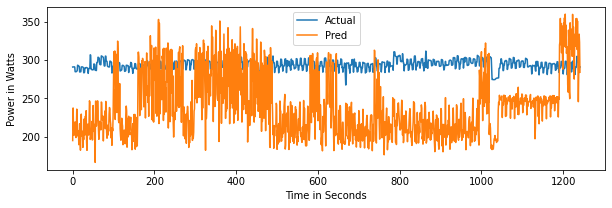

XGBoost
Mean absolute error: 84.89
Mean absolute percentage error: 28.85
Standard deviation of test set: 5.97


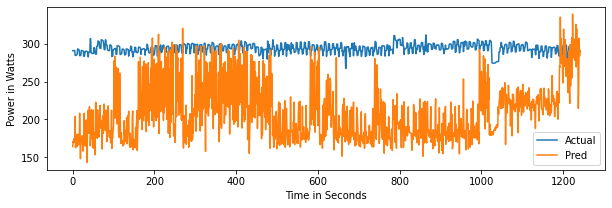

exp8app
NN
Mean absolute error: 77.47
Mean absolute percentage error: 30.19
Standard deviation of test set: 12.25


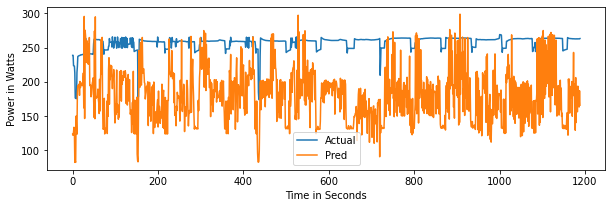

XGBoost
Mean absolute error: 65.27
Mean absolute percentage error: 25.42
Standard deviation of test set: 12.25


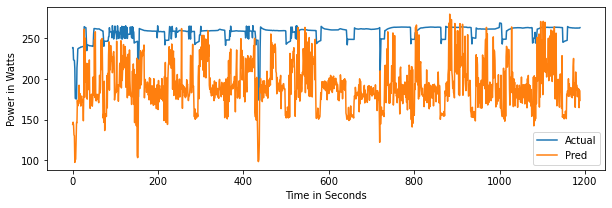

exp10app
NN
Mean absolute error: 51.6
Mean absolute percentage error: 17.92
Standard deviation of test set: 19.9


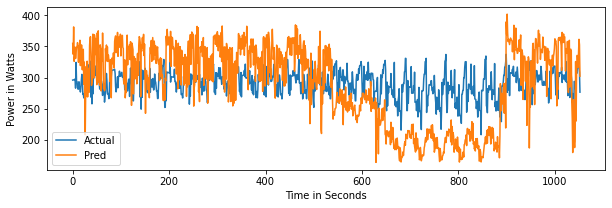

XGBoost
Mean absolute error: 35.56
Mean absolute percentage error: 12.31
Standard deviation of test set: 19.9


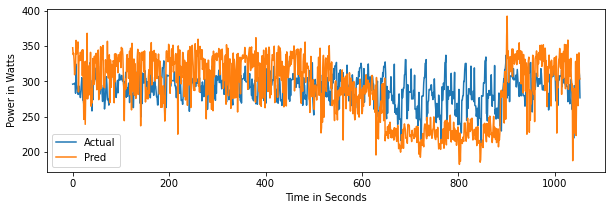

exp11app
NN
Mean absolute error: 53.42
Mean absolute percentage error: 20.37
Standard deviation of test set: 13.04


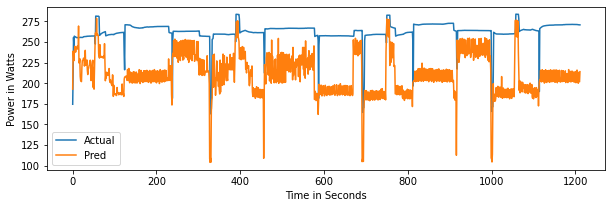

XGBoost
Mean absolute error: 53.44
Mean absolute percentage error: 20.32
Standard deviation of test set: 13.04


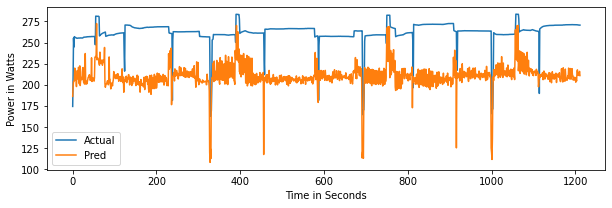

exp12app
NN
Mean absolute error: 82.33
Mean absolute percentage error: 33.58
Standard deviation of test set: 18.04


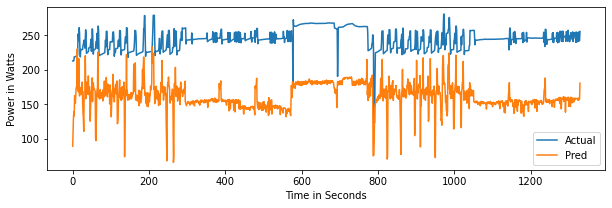

XGBoost
Mean absolute error: 38.9
Mean absolute percentage error: 15.7
Standard deviation of test set: 18.04


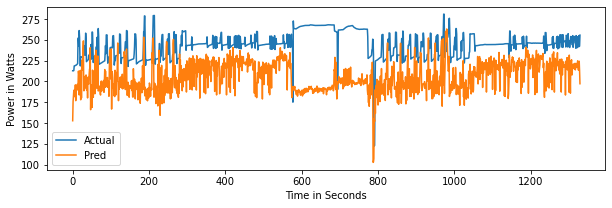

exp13app
NN
Mean absolute error: 65.65
Mean absolute percentage error: 29.2
Standard deviation of test set: 42.23


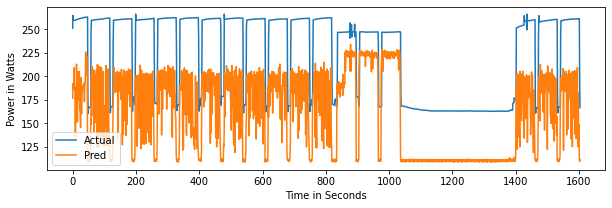

XGBoost
Mean absolute error: 50.18
Mean absolute percentage error: 22.84
Standard deviation of test set: 42.23


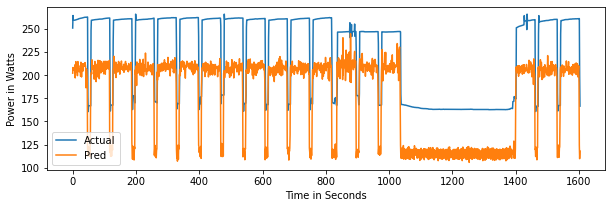

In [7]:
test  = ['exp7app','exp8app','exp10app','exp11app','exp12app','exp13app']
# test = ['exp13app']
# test  = ['exp7','exp8','exp10','exp11']
res = {}
p_flag = True
for t in test:
    print(t)
    # models = ['NN', 'Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Lasso']
    models = ['NN', 'XGBoost']
    results = {}
    oldY=df_t[t].power
    std_Y=np.std(df_t[t].power)
    for m in models:
        l = min(len(preds_1[t+'1'][m]), len(preds_2[t+'2'][m]))
        l = min(l, len(preds_3[t+'3'][m]))
    #     print(l)
#         l = len(preds_1[t][m])
        p1 = preds_1[t+'1'][m][:l]
        p2 = preds_2[t+'2'][m][:l]
        p3 = preds_3[t+'3'][m][:l]
        total_pred = (p1) + 117
        total_pred = (p1+p2+p3) if p_flag == False else (p1 + p2 + p3 + 117)
        if m == 'SVR':
            total_pred -= 2 * svr_i
        else:
            total_pred -= 2 * beta_0
#         total_pred -= 150
        mae = mean_absolute_error(oldY[:l], total_pred)
        mape = mean_absolute_percentage_error(oldY[:l], total_pred)
        mae = round(mae, 2)
        mape = round((mape*100), 2)
        std_Y = round(std_Y, 2)
        print(m)
        print("Mean absolute error:", mae)
        print("Mean absolute percentage error:", mape)
        print("Standard deviation of test set:", std_Y)
        # add results to dictionary
        results[m] = [mae, mape, std_Y]
        df_plot = pd.DataFrame({'Actual': oldY[:l], 'Pred': total_pred[:l]})
        plt.figure(figsize=(10, 3))
        plt.plot(df_plot)
        plt.legend(df_plot.columns)
        plt.ylabel("Power in Watts")
        plt.xlabel("Time in Seconds")
        plt.show()

    results_df = pd.DataFrame(results, index=['MAE', 'MAPE', 'STD'])
    res[t] = results_df

In [8]:
for t in test:
    print(t)
    results_df = res[t]
    for i, row in results_df.T.iterrows():
        print(row['MAE'])
        print(row['MAPE'])
        print(row['STD'])
        print(0)

exp7app
60.78
20.67
5.97
0
84.89
28.85
5.97
0
exp8app
77.47
30.19
12.25
0
65.27
25.42
12.25
0
exp10app
51.6
17.92
19.9
0
35.56
12.31
19.9
0
exp11app
53.42
20.37
13.04
0
53.44
20.32
13.04
0
exp12app
82.33
33.58
18.04
0
38.9
15.7
18.04
0
exp13app
65.65
29.2
42.23
0
50.18
22.84
42.23
0


In [24]:
svr_i

array([108.36469297])

In [7]:
# df_train.power -= p_idle
oldY=df_test.power
std_=np.std(df_test.power)
mean_=np.mean(df_test.power)
oldY

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
sc_X = ss.fit_transform(df_train)
sc_X = pd.DataFrame(data=sc_X)
# ss = StandardScaler()
# sc_Y = ss.fit_transform(df_test)
sc_Y = ss.transform(df_test)
sc_Y = pd.DataFrame(data=sc_Y)

std = np.std(sc_Y[11])

# X2 = df_test.iloc[:, :-1].values
# y2 = df_test.iloc[:, -1:].values
# df_mean = [120707.2775907883,1936540.3048715678,22030.79539415412,130741.61558901683,3397.2960141718336,1739415.5592559788,439975119.7674048,562883812.3179805,517065483.839504]
# # colNames = ["LLC-load-misses", "LLC-loads", "LLC-store-misses", "LLC-stores", "blocks", "bytes", "cycles", "instructions", "ref-cycles", "pkg_pwr", "ram_pwr", "power"]
# colNames = ["LLC-load-misses", "LLC-loads", "LLC-store-misses", "LLC-stores", "blocks", "bytes", "cycles", "instructions", "ref-cycles"]
# i = 0
# for cols in colNames:
#     df_train[cols] -= df_mean[i]
#     df_test[cols] -= df_mean[i]
#     i += 1
def destandardize(data):
    return data
#     dummy = pd.DataFrame(np.zeros((len(data), 12)), columns=colNames)
#     dummy["power"] = data
#     dummy = pd.DataFrame(ss.inverse_transform(dummy), columns=colNames)
#     return dummy["power"].values
#     newVar=data*std_+mean_
#     return newVar

In [8]:
df_test

,LLC-load-misses,LLC-loads,LLC-store-misses,LLC-stores,blocks,bytes,cycles,instructions,ref-cycles,pkg_pwr,ram_pwr,power
0,2090351,11593211,40576633,62699492,0,0,87903963410,9421822241,86035612931,153.21,17.21,238.6
1,1825701,8570258,44964552,69737874,11472,5873664,92207335793,10479926089,93345699528,147.39,16.90,238.6
2,1668458,10536332,43227070,68606025,0,0,82794121786,11236762209,82162510462,146.51,16.84,223.5
3,1298986,9392399,42009138,66849948,56,28672,65983363414,10976499499,64822344884,143.36,16.68,223.3
4,1012610,7905876,20731939,34349453,14784,7569408,22051607465,8489893637,22370949769,122.77,15.54,223.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1234,19173249,359740191,10151607,78063053,1168,598016,98715000681,45740462242,98438178324,179.63,15.88,263.4
1235,19431468,412438840,10116663,79721799,0,0,103207894610,46910269900,102741729934,179.05,15.91,263.5
1236,15635535,427391018,9074882,83767865,0,0,107495486689,49218788873,107538170553,179.75,15.83,263.5
1237,21925731,448593423,11247645,90345510,0,0,115830718377,53196715731,115399964906,179.38,15.94,263.7


In [9]:
# X1 = df_train.iloc[:, [0, 1, 2, 3, 6, 7, 8]].values
# # y1 = sc_X.iloc[:, -1:].values
# y1 = df_train.iloc[:, -1:].values
# X2 = df_test.iloc[:, [0, 1, 2, 3, 6, 7, 8]].values
# y2 = df_test.iloc[:, -1:].values



X1 = df_train.iloc[:, :-3].values
# y1 = sc_X.iloc[:, -1:].values
y1 = df_train.iloc[:, -1:].values
X2 = df_test.iloc[:, :-3].values
y2 = df_test.iloc[:, -1:].values

# X1 = sc_X.iloc[:, :-3].values
# # y1 = sc_X.iloc[:, -1:].values
# y1 = sc_X.iloc[:, -1:].values
# X2 = sc_Y.iloc[:, :-3].values
# y2 = sc_Y.iloc[:, -1:].values

# print(X2)

results2 = {}
preds1 = {}

model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds1['NN'] = y_pred.flatten()

model = LinearRegression(fit_intercept=False)
model.fit(X1, y1)
beta0 = model.intercept_
y_pred = model.predict(X2)
# print(y_pred)
# y_pred=destandardize(y_pred)
preds1['Linear Regression'] = y_pred.flatten()

model = DecisionTreeRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds1['Decision Tree'] = y_pred.flatten()

model = RandomForestRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds1['Random Forest'] = y_pred.flatten()
 
model = SVR()
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds1['SVR'] = y_pred.flatten()

model = XGBRegressor(n_estimators=1000,max_depth=3,eta=0.001)
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds1['XGBoost'] = y_pred.flatten()

model = Lasso(alpha=0.1)
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds1['Lasso'] = y_pred.flatten()


/Users/roton/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/5l/144n_3m9249dj9_cd9m97pf80000gn/T/ipykernel_3519/4129704107.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)
/Users/roton/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/roton/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase 

In [166]:
# trainset = ['manual_mc1', 'manual_tf3', 'manual_mnn1', 'manual_sys1', 'manual_stress2', 'user7zip', 'usercp2k', 'usercrypto', 'usergzip', 'userstream2', 'userfio', 'userramspeed', 'usertinymemb', 'userlinux', 'idle']
# trainset = ['mc', 'mc2', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress', '7zip', 'cp2k', 'crypto', 'gzip', 'stream', 'fio', 'leveldb', 'mbw', 'ramspeedsmp', 'tinymemb', 'litesql', 'lkernel', 'filebench_all', 'ycsbmongo_all2', 'syscpu', 'sysmem', 'idle']
trainset = ['exp1','exp2','exp3','exp4','exp5','exp6','exp7app1','exp7app2','exp8app1','exp8app2','exp9app1','exp9app2']
testset = ['exp8app2']
ignoreset = ['filebench_all', 'ycsbmongo_all2',]
# ignoreset = ['mc', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress']
# ignoreset = ['exp1','exp2','exp3','exp4','exp5','exp6']
alwaysignore = ['exp7app1','exp7app2','exp8app1','exp8app2','exp9app1','exp9app2']
# alwaysignore = ['7zip', 'cp2k', 'crypto', 'gzip', 'stream', 'fio', 'leveldb', 'mbw', 'ramspeedsmp', 'tinymemb', 'litesql', 'lkernel', 'syscpu', 'sysmem', 'mc2', 'idle']
df_train = pd.DataFrame()
# df_train = df_all[trainset[0]]
# print(trainset[0], "included in training set")
for t in trainset:
    if t in testset or t in ignoreset or t in alwaysignore:
        continue
    df_train = df_train.append(df_all[t], ignore_index=True)
    print(t, "included in training set")

df_test = pd.DataFrame()
for t in testset:
    df_test = df_test.append(df_all[t], ignore_index=True)
    print(t, "included in testing set")

/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_57641/2632781898.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)


exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp8app2 included in testing set


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_57641/2632781898.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)


In [167]:
df_train.power -= p_idle
oldY=df_test.power
std_=np.std(df_test.power)
mean_=np.mean(df_test.power)
oldY

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
sc_X = ss.fit_transform(df_train)
sc_X = pd.DataFrame(data=sc_X)
# ss = StandardScaler()
# sc_Y = ss.fit_transform(df_test)
sc_Y = ss.transform(df_test)
sc_Y = pd.DataFrame(data=sc_Y)

std = np.std(sc_Y[11])

# X2 = df_test.iloc[:, :-1].values
# y2 = df_test.iloc[:, -1:].values

colNames = ["LLC-load-misses", "LLC-loads", "LLC-store-misses", "LLC-stores", "blocks", "bytes", "cycles", "instructions", "ref-cycles", "pkg_pwr", "ram_pwr", "power"]

def destandardize(data):
    dummy = pd.DataFrame(np.zeros((len(data), 12)), columns=colNames)
    dummy["power"] = data
    dummy = pd.DataFrame(ss.inverse_transform(dummy), columns=colNames)
    return dummy["power"].values
#     newVar=var*std_+mean_
#     return newVar

In [168]:
X1 = df_train.iloc[:, :-3].values
# y1 = sc_X.iloc[:, -1:].values
y1 = df_train.iloc[:, -1:].values
X2 = df_test.iloc[:, :-3].values
y2 = df_test.iloc[:, -1:].values

# X1 = sc_X.iloc[:, :-3].values
# # y1 = sc_X.iloc[:, -1:].values
# y1 = sc_X.iloc[:, -1:].values
# X2 = sc_Y.iloc[:, :-3].values
# y2 = sc_Y.iloc[:, -1:].values

# print(X2)

results2 = {}
preds2 = {}

model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds2['NN'] = y_pred.flatten()

model = LinearRegression(fit_intercept=False)
model.fit(X1, y1)
y_pred = model.predict(X2)
# print(y_pred)
# y_pred=destandardize(y_pred)
preds2['Linear Regression'] = y_pred.flatten()

model = DecisionTreeRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds2['Decision Tree'] = y_pred.flatten()

model = RandomForestRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds2['Random Forest'] = y_pred.flatten()
 
model = SVR()
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds2['SVR'] = y_pred.flatten()

model = XGBRegressor(n_estimators=1000,max_depth=3,eta=0.001)
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds2['XGBoost'] = y_pred.flatten()

model = Lasso(alpha=0.1)
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds2['Lasso'] = y_pred.flatten()


/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_57641/2638693296.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want

In [169]:
# trainset = ['manual_mc1', 'manual_tf3', 'manual_mnn1', 'manual_sys1', 'manual_stress2', 'user7zip', 'usercp2k', 'usercrypto', 'usergzip', 'userstream2', 'userfio', 'userramspeed', 'usertinymemb', 'userlinux', 'idle']
# trainset = ['mc', 'mc2', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress', '7zip', 'cp2k', 'crypto', 'gzip', 'stream', 'fio', 'leveldb', 'mbw', 'ramspeedsmp', 'tinymemb', 'litesql', 'lkernel', 'filebench_all', 'ycsbmongo_all2', 'syscpu', 'sysmem', 'idle']
trainset = ['exp1','exp2','exp3','exp4','exp5','exp6','exp7','exp8','exp9','exp7app1','exp7app2','exp7app3','exp8app1','exp8app2','exp8app3','exp9app1','exp9app2','exp9app3']
testset = ['exp8app3']
ignoreset = ['filebench_all', 'ycsbmongo_all2',]
# ignoreset = ['mc', 'tf', 'mnn', 'mnn-2', 'sys', 'sys-2', 'stress']
ignoreset = ['exp7','exp8','exp9']
alwaysignore = ['exp7app1','exp7app2','exp7app3','exp8app1','exp8app2','exp8app3','exp9app1','exp9app2','exp9app3']
# alwaysignore = ['7zip', 'cp2k', 'crypto', 'gzip', 'stream', 'fio', 'leveldb', 'mbw', 'ramspeedsmp', 'tinymemb', 'litesql', 'lkernel', 'syscpu', 'sysmem', 'mc2', 'idle']
df_train = pd.DataFrame()
# df_train = df_all[trainset[0]]
# print(trainset[0], "included in training set")
for t in trainset:
    if t in testset or t in ignoreset or t in alwaysignore:
        continue
    df_train = df_train.append(df_all[t], ignore_index=True)
    print(t, "included in training set")

df_test = pd.DataFrame()
for t in testset:
    df_test = df_test.append(df_all[t], ignore_index=True)
    print(t, "included in testing set")

/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_57641/2466015650.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_all[t], ignore_index=True)


exp1 included in training set
exp2 included in training set
exp3 included in training set
exp4 included in training set
exp5 included in training set
exp6 included in training set
exp8app3 included in testing set


/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_57641/2466015650.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(df_all[t], ignore_index=True)


In [170]:
df_train.power -= p_idle
oldY=df_test.power
std_=np.std(df_test.power)
mean_=np.mean(df_test.power)
oldY

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
sc_X = ss.fit_transform(df_train)
sc_X = pd.DataFrame(data=sc_X)
ss = StandardScaler()
sc_Y = ss.fit_transform(df_test)
# sc_Y = ss.transform(df_test)
sc_Y = pd.DataFrame(data=sc_Y)

std = np.std(sc_Y[11])

# X2 = df_test.iloc[:, :-1].values
# y2 = df_test.iloc[:, -1:].values

colNames = ["LLC-load-misses", "LLC-loads", "LLC-store-misses", "LLC-stores", "blocks", "bytes", "cycles", "instructions", "ref-cycles", "pkg_pwr", "ram_pwr", "power"]

def destandardize(data):
#     dummy = pd.DataFrame(np.zeros((len(data), 12)), columns=colNames)
#     dummy["power"] = data
#     dummy = pd.DataFrame(ss.inverse_transform(dummy), columns=colNames)
#     return dummy["power"].values
    newVar=data*std_+mean_
    return newVar

In [171]:
X1 = df_train.iloc[:, :-3].values
# y1 = sc_X.iloc[:, -1:].values
y1 = df_train.iloc[:, -1:].values
X2 = df_test.iloc[:, :-3].values
y2 = df_test.iloc[:, -1:].values

# X1 = sc_X.iloc[:, :-3].values
# # y1 = sc_X.iloc[:, -1:].values
# y1 = sc_X.iloc[:, -1:].values
# X2 = sc_Y.iloc[:, :-3].values
# y2 = sc_Y.iloc[:, -1:].values

# print(X2)

results2 = {}
preds3 = {}

model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds3['NN'] = y_pred.flatten()

model = LinearRegression(fit_intercept=False)
model.fit(X1, y1)
y_pred = model.predict(X2)
# print(y_pred)
# y_pred=destandardize(y_pred)
preds3['Linear Regression'] = y_pred.flatten()

model = DecisionTreeRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds3['Decision Tree'] = y_pred.flatten()

model = RandomForestRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds3['Random Forest'] = y_pred.flatten()
 
model = SVR()
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds3['SVR'] = y_pred.flatten()

model = XGBRegressor(n_estimators=1000,max_depth=3,eta=0.001)
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds3['XGBoost'] = y_pred.flatten()

model = Lasso(alpha=0.1)
model.fit(X1, y1)
y_pred = model.predict(X2)
# y_pred=destandardize(y_pred)
preds3['Lasso'] = y_pred.flatten()

/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_57641/2779860458.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want

[1.19072495 1.19072495 1.19072495 ... 1.19072495 1.19072495 1.19072495]
[111.19072495 111.19072495 111.19072495 ... 111.19072495 111.19072495
 111.19072495]
NN
Mean absolute error: 145.71
Mean absolute percentage error: 56.59
Standard deviation of test set: 12.25


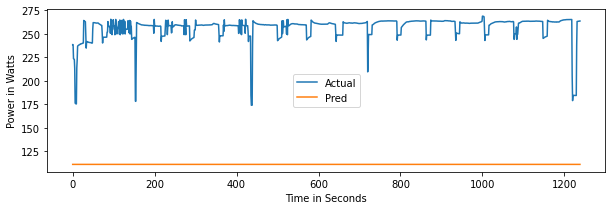

[ 86.09297083  95.44785524  87.74224916 ... 149.35110685 164.66441905
 152.1497968 ]
[196.09297083 205.44785524 197.74224916 ... 259.35110685 274.66441905
 262.1497968 ]
Linear Regression
Mean absolute error: 15.83
Mean absolute percentage error: 6.3
Standard deviation of test set: 12.25


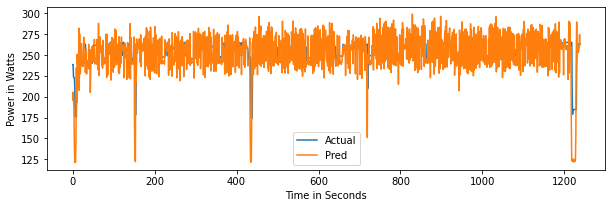

[128.6 128.6 113.5 ... 153.5 153.7 153.7]
[238.6 238.6 223.5 ... 263.5 263.7 263.7]
Decision Tree
Mean absolute error: 0.0
Mean absolute percentage error: 0.0
Standard deviation of test set: 12.25


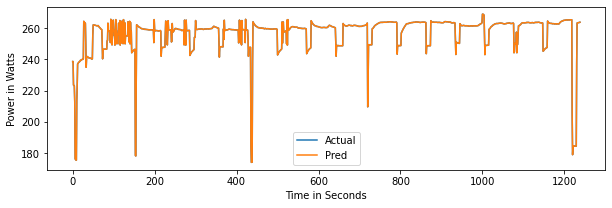

[120.739 115.851 114.6   ... 153.771 153.824 153.553]
[230.739 225.851 224.6   ... 263.771 263.824 263.553]
Random Forest
Mean absolute error: 1.15
Mean absolute percentage error: 0.49
Standard deviation of test set: 12.25


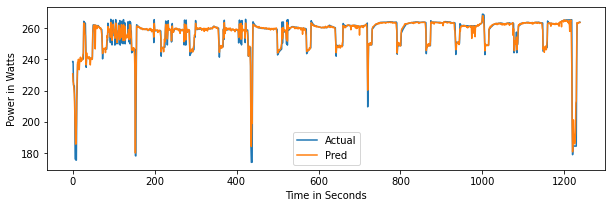

[141.62978771 141.50213504 142.42074037 ... 152.06173346 152.18233053
 152.12204928]
[251.62978771 251.50213504 252.42074037 ... 262.06173346 262.18233053
 262.12204928]
SVR
Mean absolute error: 4.87
Mean absolute percentage error: 2.13
Standard deviation of test set: 12.25


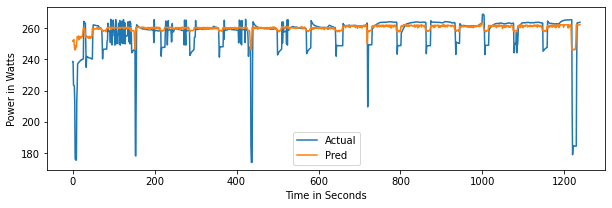

[69.77573 73.10905 69.77573 ... 95.36132 95.36132 95.36132]
[179.77573 183.10904 179.77573 ... 205.36133 205.36133 205.36133]
XGBoost
Mean absolute error: 54.09
Mean absolute percentage error: 20.98
Standard deviation of test set: 12.25


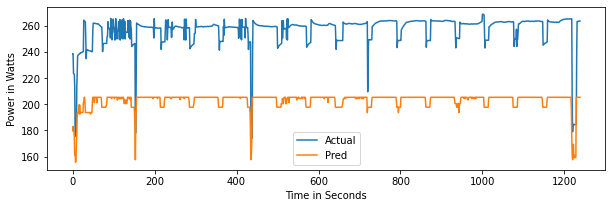

[113.90368864 114.56558536 114.33720062 ... 153.83703672 158.07219836
 155.14603046]
[223.90368864 224.56558536 224.33720062 ... 263.83703672 268.07219836
 265.14603046]
Lasso
Mean absolute error: 5.14
Mean absolute percentage error: 2.14
Standard deviation of test set: 12.25


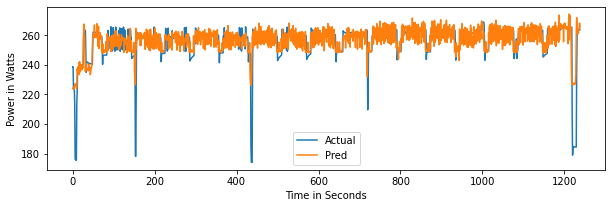

In [10]:
models = ['NN', 'Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Lasso']
results = {}
for m in models:
#     l = min(len(preds1[m]), len(preds2[m]), len(preds3[m]))
#     print(l)
    l = len(preds1[m])
    p1 = (preds1[m][:l])
    print(p1)
#     p2 = (preds2[m][:l])
#     p3 = (preds3[m][:l])
    total_pred = p1 + p_idle
    print(total_pred)
#     total_pred = (p1 + p2 + p3) + p_idle
    mae = mean_absolute_error(oldY[:l], total_pred)
    mape = mean_absolute_percentage_error(oldY[:l], total_pred)
    mae = round(mae, 2)
    mape = round((mape*100), 2)
    std_ = round(std_, 2)
    print(m)
    print("Mean absolute error:", mae)
    print("Mean absolute percentage error:", mape)
    print("Standard deviation of test set:", std_)
    # add results to dictionary
    results[m] = [mae, mape, std_]
    df_plot = pd.DataFrame({'Actual': oldY[:l], 'Pred': total_pred})
    plt.figure(figsize=(10, 3))
    plt.plot(df_plot)
    plt.legend(df_plot.columns)
    plt.ylabel("Power in Watts")
    plt.xlabel("Time in Seconds")
    plt.show()

results_df = pd.DataFrame(results, index=['MAE', 'MAPE', 'STD'])

In [183]:
beta0[0]

178.77409588918286

In [215]:
print('MAPE:')
for i, row in results_df.T.iterrows():
    print(i + ' ' +  str(row['MAPE']) + '%')

MAPE:
NN 56.83%
Linear Regression 6.32%
Decision Tree 0.0%
Random Forest 0.49%
SVR 2.1%
XGBoost 20.98%
Lasso 2.15%


In [203]:
for i, row in results_df.T.iterrows():
    print(row['MAE'])
    print(row['MAPE'])
    print(row['STD'])
    print(0)

148.3
57.6
12.25
0
118.45
46.12
12.25
0
139.26
54.28
12.25
0
132.44
51.6
12.25
0
107.75
42.0
12.25
0
132.52
51.56
12.25
0
103.49
40.41
12.25
0


In [28]:
preds1['NN']

array([-0.31295516, -0.31295516, -0.31295516, ..., -0.31295516,
       -0.31295516, -0.31295516])

In [29]:
preds2['NN']

array([ 1.05506560e+06,  1.23077166e-01,  1.23077166e-01, ...,
       -8.25720559e+06, -8.81527722e+06, -8.27061473e+06])

In [ ]:
preds1['Linear Regression'][:l] + preds2['Linear Regression'][:l]

In [147]:
y_pred

array([188.26777698, 187.78129002, 187.78129002, ..., 274.37520107,
       280.23204542, 275.13106487])

/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(512, 16, 16), learning_rate_init=0.1,
             max_iter=10000)
Mean absolute error: 2.81
Mean absolute percentage error: 2.32
Standard deviation of test set: 10.51


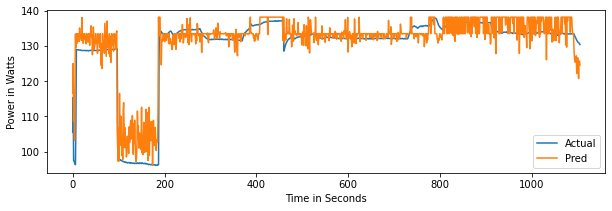

LinearRegression()
Model coefficients: [[ 0.04063846 -0.06469357  0.0042489   0.00391742 -0.00090586 -0.00090586
   0.29915303 -0.05754963 -0.21565365  0.75144421  0.12624343]]
Model intercept: [3.25548473e-16]
Mean absolute error: 1.61
Mean absolute percentage error: 1.35
Standard deviation of test set: 10.51


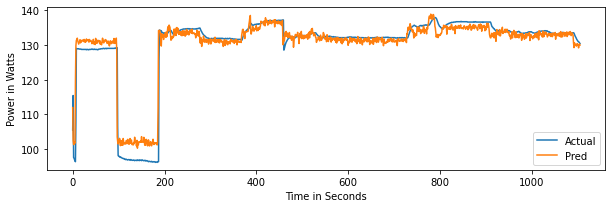

DecisionTreeRegressor()
Mean absolute error: 10.19
Mean absolute percentage error: 8.02
Standard deviation of test set: 10.51


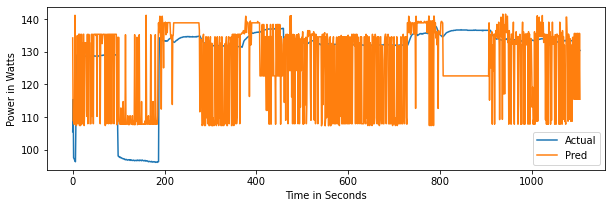

/var/folders/pv/sk5mn87n4qg0kbxmv0kfg3yr0000gn/T/ipykernel_71414/3275631197.py:101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1, y1)


RandomForestRegressor()
Mean absolute error: 6.11
Mean absolute percentage error: 5.14
Standard deviation of test set: 10.51


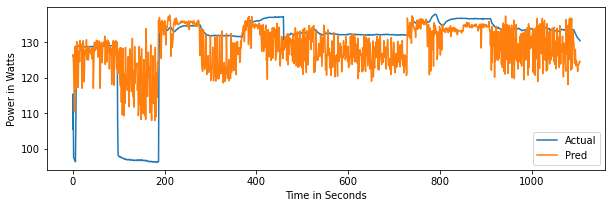

/Users/roton/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()
Mean absolute error: 2.37
Mean absolute percentage error: 2.12
Standard deviation of test set: 10.51


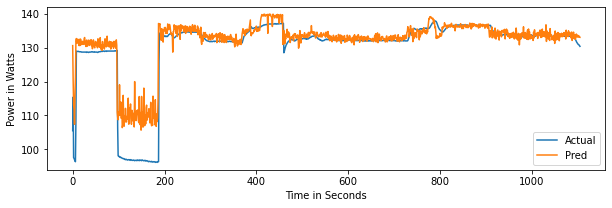

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.001, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)
Mean absolute error: 3.7
Mean absolute percentage error: 3.37
Standard deviation of test set: 10.51


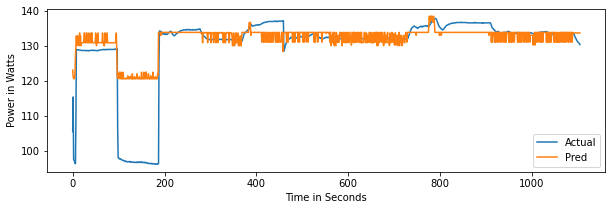

Lasso(alpha=0.1)
Mean absolute error: 2.07
Mean absolute percentage error: 1.77
Standard deviation of test set: 10.51


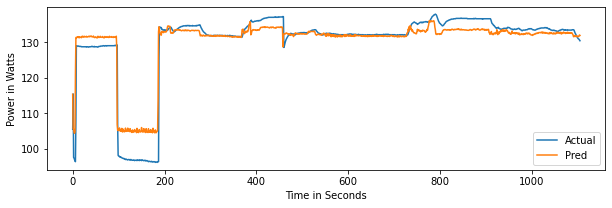

In [60]:



results = {}


model = MLPRegressor(hidden_layer_sizes= (512,16,16,),learning_rate='constant', alpha= 0.0001, learning_rate_init= 0.1, max_iter= 10000, activation= 'relu')
model.fit(X1, y1)
y_pred = model.predict(X2)

y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['NN'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()



model = LinearRegression(fit_intercept=True)
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['Linear Regression'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()



model = DecisionTreeRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['Decision Tree'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()


# Create a random forst regression model
model = RandomForestRegressor()
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['Random Forest'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()

 
 
model = SVR()
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['SVR'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()



model = XGBRegressor(n_estimators=1000,max_depth=3,eta=0.001)
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['XGBoost'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()




model = Lasso(alpha=0.1)
model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
mae = round(mae, 2)
mape = round((mape*100), 2)
std_ = round(std_, 2)
print(model)
print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Standard deviation of test set:", std_)
# add results to dictionary
results['Lasso'] = [mae, mape, std_]
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()


# convert results to dataframe
results_df = pd.DataFrame(results, index=['MAE', 'MAPE', 'STD'])

In [13]:
len(X2[0])

9

In [62]:
for i, row in results_df.T.iterrows():
    print(row['MAE'])
    print(row['MAPE'])
    print(row['STD'])
    print(0)

2.81
2.32
10.51
0
1.61
1.35
10.51
0
10.19
8.02
10.51
0
6.11
5.14
10.51
0
2.37
2.12
10.51
0
3.7
3.37
10.51
0
2.07
1.77
10.51
0


Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('linearregression', LinearRegression())])
Mean absolute error: 4.95
Mean absolute percentage error: 3.8
Standard deviation of test set: 5.4


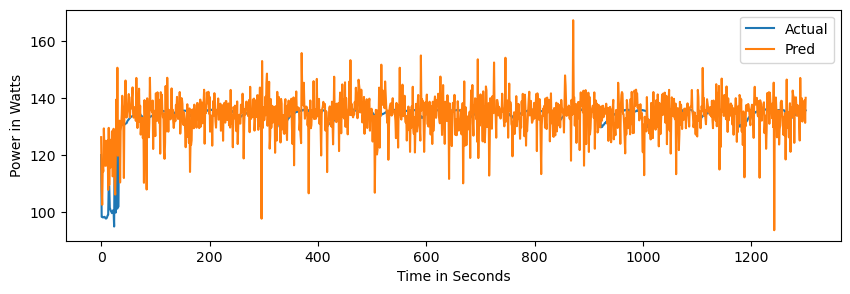

In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

d=2
model=make_pipeline(PolynomialFeatures(degree=d,interaction_only=True),LinearRegression())


model.fit(X1, y1)
y_pred = model.predict(X2)
y_pred=destandardize(y_pred)

mae = mean_absolute_error(oldY, y_pred)
mape = mean_absolute_percentage_error(oldY, y_pred)
print(model)
print("Mean absolute error:", round(mae, 2))
print("Mean absolute percentage error:", round((mape*100), 2))
print("Standard deviation of test set:", round(std_, 2))
df_plot = pd.DataFrame({'Actual': oldY, 'Pred': y_pred.flatten()})
plt.figure(figsize=(10, 3))
plt.plot(df_plot)
plt.legend(df_plot.columns)
plt.ylabel("Power in Watts")
plt.xlabel("Time in Seconds")
plt.show()



In [110]:
results_df.T

,MAE,MAPE,STD
NN,35.25,12.51,21.42
Linear Regression,9.25,3.28,21.42
Decision Tree,21.19,7.35,21.42
Random Forest,18.07,6.46,21.42
SVR,19.50,7.05,21.42
XGBoost,16.20,5.82,21.42
Lasso,8.73,3.09,21.42


In [111]:
results2_df.T

,MAE,MAPE,STD
NN,16.48,5.83,21.42
Linear Regression,18.23,6.43,21.42
Decision Tree,27.67,9.82,21.42
Random Forest,23.63,8.58,21.42
SVR,28.75,10.19,21.42
XGBoost,18.96,6.91,21.42
Lasso,12.43,4.45,21.42


In [109]:
# convert results to dataframe
results_df = pd.DataFrame(results, index=['MAE', 'MAPE', 'STD'])

,model,MAE_0,MAPE_1,STD_2
0,NN,35.25,12.51,21.42
1,Linear Regression,9.25,3.28,21.42
2,Decision Tree,21.19,7.35,21.42
3,Random Forest,18.07,6.46,21.42
4,SVR,19.50,7.05,21.42
5,XGBoost,16.20,5.82,21.42
6,Lasso,8.73,3.09,21.42


In [120]:
for i, row in results_df.T.iterrows():
    print(row['MAE'])
    print(row['MAPE'])
    print(row['STD'])
    print()

35.25
12.51
21.42

9.25
3.28
21.42

21.19
7.35
21.42

18.07
6.46
21.42

19.5
7.05
21.42

16.2
5.82
21.42

8.73
3.09
21.42



In [123]:
for i, row in results2_df.T.iterrows():
    print(row['MAE'])
    print(row['MAPE'])
    print(row['STD'])
    print(0)

16.48
5.83
21.42
0
18.23
6.43
21.42
0
27.67
9.82
21.42
0
23.63
8.58
21.42
0
28.75
10.19
21.42
0
18.96
6.91
21.42
0
12.43
4.45
21.42
0
